# House Prices: Advanced Regression Techniques

In this notebook, we will predict the house price from the house's data.
This subject is from kaggle competition of [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

The purpose of this notebook is to **experience a series of flow from data analysis to modeling**.

In order to seek high scores, please refer to other notebooks.

The notebook will proceed with the flow below.

1. Problem definition
1. Prepare the data
1. Preprocessing
1. Analysis of data
1. Model creation
1. Visualize it and report it.

So let's start and enjoy data analysis!


## 1.Problem definition

The purpose in this competition is to accurately predict the house price from the house's data (years of construction, area etc.).

The final score is calculated by [Root-Mean-Squared-Error (RMSE)] (https://en.wikipedia.org/wiki/Root-mean-square_deviation).


## 2.Prepare the data

This notebook use the [Data] (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) prepared in the kaggle competition.

First, load the data.

In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = '../input/'
train_df = pd.read_csv(data_path + 'train.csv')
test_df = pd.read_csv(data_path + 'test.csv')

Look at the size of data.

In [3]:
train_df.shape

(1460, 81)

There are 1460 data, but it is not that big data.
There are 81 features.

Let's see some data next.

In [4]:
# Set the maximum display number of columns to 100. The default is 50
pd.set_option("display.max_columns", 100)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Category data and numerical data have missing values.

## 3.Preprocessing

Because problem type is a linear regression, we need to convert each variable to numerical data without missing value for modeling.

First of all, we display feature values that have missing values.

In [5]:
for line in train_df.columns:
    null_num = train_df[line].isnull().sum()
    if null_num > 0:
        print(line+"："+str(train_df[line].isnull().sum())+"（"+str(train_df[line].dtype)+")")

LotFrontage：259（float64)
Alley：1369（object)
MasVnrType：8（object)
MasVnrArea：8（float64)
BsmtQual：37（object)
BsmtCond：37（object)
BsmtExposure：38（object)
BsmtFinType1：37（object)
BsmtFinType2：38（object)
Electrical：1（object)
FireplaceQu：690（object)
GarageType：81（object)
GarageYrBlt：81（float64)
GarageFinish：81（object)
GarageQual：81（object)
GarageCond：81（object)
PoolQC：1453（object)
Fence：1179（object)
MiscFeature：1406（object)


For the above variables, we will do the following processing from here.

- Fill missing values
- Convert category data to numerical data


In [6]:
for df in [train_df, test_df]:
    for col in df.columns:
        if df[col].dtype == 'object':
            # convet nan to 'NullObject' and convert value to unique numeric value
            df[col] = df[col].fillna("NullObject")
            df[col] = df[col].map({ x : i for i, x in enumerate(np.unique(df[col]))})
        else:
            # convert nan to colmun's mean value
            df[col] = df[col].fillna(df[col].mean())

Check if there are no null values .

In [7]:
print('null count for train_df : ' + str(train_df.isnull().sum().sum()))
print('null count for test_df : ' + str(test_df.isnull().sum().sum()))

null count for train_df : 0
null count for test_df : 0


In [8]:
pd.set_option("display.max_columns", 100)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000


In [9]:
for df in [train_df, test_df]:
    for col in df.columns:
        if df[col].dtype == 'object':
            print("Category column exist!!!!")
else:
    print('There is no category column. ')

There is no category column. 


OK, we have completed converting!

## 4. Analysis of data

Now data become clean, let's go into analysis.
In this notebook we will look at the correlation with variables.

We will displays the top 10 features with high correlation with SalePrice in the heat map.

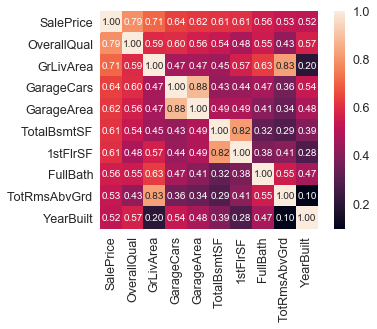

In [10]:
corrmat = train_df.corr()

# ranking top 10 columns order of correlation coefficient with SalePrice
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(train_df[cols].values.T)

# display heatmap
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

We wil select a feature to learn model from here.

GarageCars and GarageArea variables have a strong positive correlation with 0.88,
so that the number of cars that can be parked in the garage and the area of the garage explain the same thing.

So we omit GarageArea.
We also omit SalePrice because this is the target variable.

In [11]:
cols = cols.drop('GarageArea')
cols = cols.drop('SalePrice')
cols

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

## 6.Visualize it and report it.

We decided features to learn, so we will start modeling and evaluation.
We will do modeling using 8 features that are likely to affect the SalePrice.

There are a lot of prediction model algorithms as options, but this problem is a regression problem in supervised learning.

Therefore we chose the following 9 algorithms.

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

Next, prepare the data.

In [12]:
# select training data's feature
X = train_df[cols]
# target variable is SalePrice
Y = train_df['SalePrice']
# select test data's feature
X_test = test_df[cols]
# Make sure the number of features is the same between test and training set
X.shape, Y.shape ,X_test.shape

((1460, 8), (1460,), (1459, 8))

In [13]:
# Import machine learning algorithm module
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
model_dict = {
    "LogisticRegression": LogisticRegression(),
    "SVM" : SVC(),
    "KNN" : KNeighborsClassifier(n_neighbors = 3),
    "Gaussian" : GaussianNB(),
    'Perceptron' : Perceptron(),
    'Linear SVC'  : LinearSVC(),
    'Stochastic Gradient Descent' : SGDClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(n_estimators=100),
}

In [15]:
import sklearn.cross_validation as cross_validation
from sklearn.metrics import mean_squared_error
import math


best_score = 10000000000000
best_model = ""

model_score = {}

for model_name, model_instance in model_dict.items():
    rmse_score = []
    for rand_seed in range(5):
        X_train, X_valid, Y_train, Y_valid = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=rand_seed)
        model_instance.fit(X_train, Y_train)
        Y_pred = model_instance.predict(X_valid)
        rmse_score.append(math.sqrt(mean_squared_error(Y_valid, Y_pred)/ len(Y_valid)))
        
    average_score = sum(rmse_score) / len(rmse_score) 
    model_score[model_name] = average_score
    print(model_name + "'s average score : {}".format(round(average_score) ))
    if average_score < best_score:
        best_score = average_score
        best_model = model_name

print("Best model is " + best_model )
print(round(best_score))

/Users/kzfm/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression's average score : 3016
SVM's average score : 5146
KNN's average score : 3366
Gaussian's average score : 2764


/Users/kzfm/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron's average score : 5771
Linear SVC's average score : 5549


/Users/kzfm/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Stochastic Gradient Descent's average score : 4767
Decision Tree's average score : 2602
Random Forest's average score : 2226
Best model is Random Forest
2226


Plot the score of each model.

In [16]:
 model_score_df = pd.DataFrame(columns=['model','score'])
for name, score in model_score.items():
    model_score_df = model_score_df.append(pd.Series([name, score], index=model_score_df.columns), ignore_index = True)
model_score_df = model_score_df.sort_values(by='score', ascending=True)

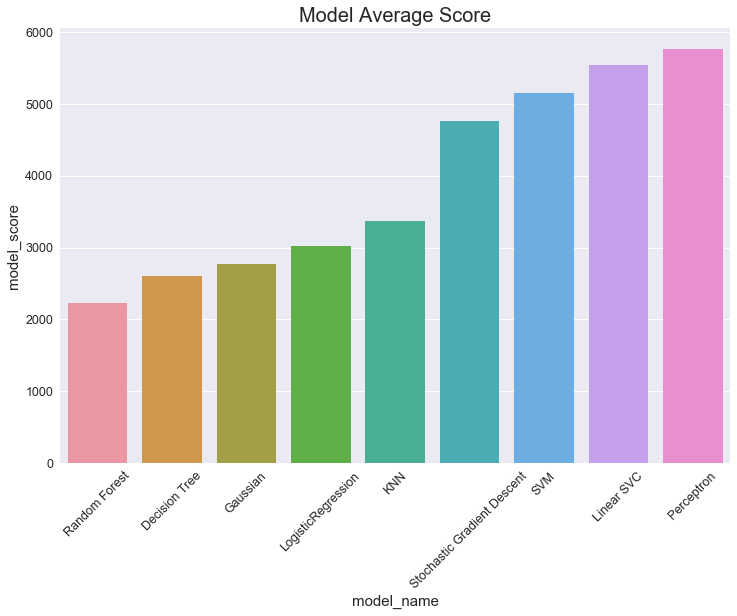

In [17]:
fig = plt.figure(figsize=(12, 8))
sns.barplot(x='model', y='score', data=model_score_df)
plt.xlabel('model_name', fontsize= 15)
plt.ylabel('model_score', fontsize= 15)
plt.title('Model Average Score', fontsize= 20)
plt.xticks(rotation=45);
plt.show()

The best model of this time is ** Random Forest **.

Therefore, we will predict saleprice using random forest.

In [18]:
Y_pred = model_dict['Random Forest'].predict(X_test)

Below is the code for submission.

If you execute comment out and execute it, a submission.csv file will be created in the current directory.

In [19]:
submission = pd.DataFrame({
       "Id": test_df["Id"],
       "SalePrice": Y_pred
   })
# If you want to create submission file, please remove coment out from the following sentence.
# submission.to_csv("./submission.csv", index=False)

## Summary

So far we have performed a series of data analysis steps.

- Random Forest has the best score with nine models.
- The top five of the strongest correlations with the objective variable are the following five features.
     - 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1st FllSF'

However, I did not good score much　: (

Score is 0.21064 and rank 4558 in April 30, 2018.

Here is improvement points.

## improvement points
    
- Preprocessing
     - I mechanically replaced the category data with numerical values. Category features that originally have order need to be replaced with ordered numbers.
- Feature engineering
     - Add the total area of the features of the area features.
     - Establish a hypothesis using not only the correlation coefficient but also given domain knowledge.
- Validation
     - Switch the way of verification to cross validation.
- Random Forest
     - Random forest selects the feature automatically, we don't limit the feature, and let the model learn more features
     - Perform parameter tuning with grid search.


# Questions and comments are greatly appreciated.